In [231]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(drug_data, clinical_data, on = "Mouse ID")

# Display the data table for preview
data.head()

drug_unique = data["Drug"].unique().tolist()

drug_unique

data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [229]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_group = data.groupby(['Drug','Timepoint'])

avg_tumor = drug_group['Tumor Volume (mm3)'].mean()
avg_tumor_db = pd.DataFrame(avg_tumor).reset_index()


# Convert to DataFrame

# Preview DataFrame
avg_tumor_db.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [211]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

std_dev = drug_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame

std_dev_tumor = pd.DataFrame(std_dev).reset_index()
# Preview DataFrame

std_dev_tumor.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [181]:
# Minor Data Munging to Re-Format the Data Framess
avg_tumor_db_pivot = avg_tumor_db.pivot( columns='Drug', index ='Timepoint')["Tumor Volume (mm3)"]
std_dev_tumor_pivot = std_dev_tumor.pivot( columns ='Drug', index ='Timepoint')["Tumor Volume (mm3)"]
# Preview that Reformatting worked
avg_tumor_db_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [183]:
std_dev_tumor_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


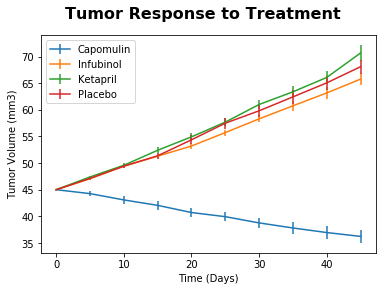

In [201]:

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=16, fontweight="bold")


ax.errorbar(avg_tumor_db_pivot.index, avg_tumor_db_pivot['Capomulin'],yerr = std_dev_tumor_pivot['Capomulin'], label = "Capomulin")
ax.errorbar(avg_tumor_db_pivot.index, avg_tumor_db_pivot['Infubinol'],yerr = std_dev_tumor_pivot['Infubinol'],label = "Infubinol")
ax.errorbar(avg_tumor_db_pivot.index, avg_tumor_db_pivot['Ketapril'],yerr = std_dev_tumor_pivot['Ketapril'],label = "Ketapril")
ax.errorbar(avg_tumor_db_pivot.index, avg_tumor_db_pivot['Placebo'],yerr = std_dev_tumor_pivot['Placebo'],label = "Placebo")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [199]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = drug_group['Metastatic Sites'].mean()

# Convert to DataFrame
metsite_mean_db = pd.DataFrame(met_site_mean).reset_index()
# Preview DataFrame
metsite_mean_db.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [198]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

std_dev = drug_group['Metastatic Sites'].sem()

# Convert to DataFrame

metsite_stddev_db = pd.DataFrame(std_dev).reset_index()
# Preview DataFrame

metsite_stddev_db.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [200]:
# Minor Data Munging to Re-Format the Data Frames

metsite_mean_pivot = metsite_mean_db.pivot( columns='Drug', index ='Timepoint')["Metastatic Sites"]
metsite_stddev_pivot = metsite_stddev_db.pivot( columns ='Drug', index ='Timepoint')["Metastatic Sites"]

# Preview that Reformatting worked

metsite_mean_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


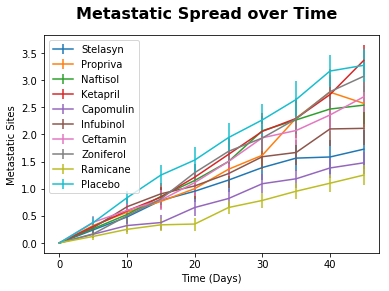

<Figure size 432x288 with 0 Axes>

In [223]:

fig, ax = plt.subplots()

fig.suptitle("Metastatic Spread over Time", fontsize=16, fontweight="bold")

for drug in drug_unique:
    
    ax.errorbar(metsite_mean_pivot.index, 
    metsite_mean_pivot[drug],
    yerr = metsite_stddev_pivot[drug], 
    label = drug)
    
    
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
plt.legend()
plt.show()

# Save the Figure
plt.savefig('metastatic_spread')
# Show the Figure


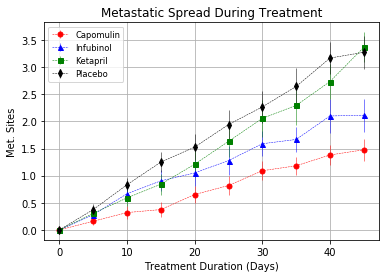

## Survival Rates

In [230]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_avg = drug_group['Mouse Count'].count()

# Convert to DataFrame
mice_mean_db = pd.DataFrame(mice_mean_db).reset_index()
# Preview DataFrame
mice_mean_db.head()

KeyError: 'Column not found: Mouse Count'

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

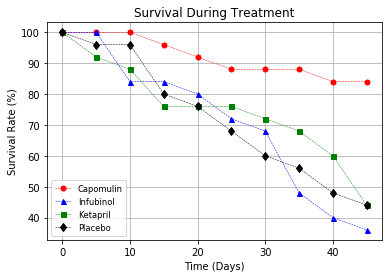

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

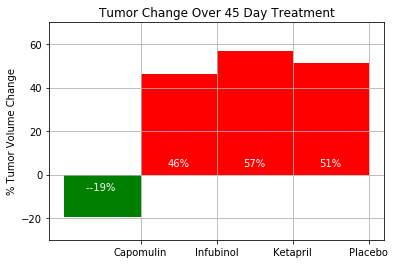